In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [ ]:
data=pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

<ipython-input-10-9b71f5305629>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)


In [ ]:
IndexData=data.set_index(['Month'])

In [ ]:
from datetime import datetime
IndexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


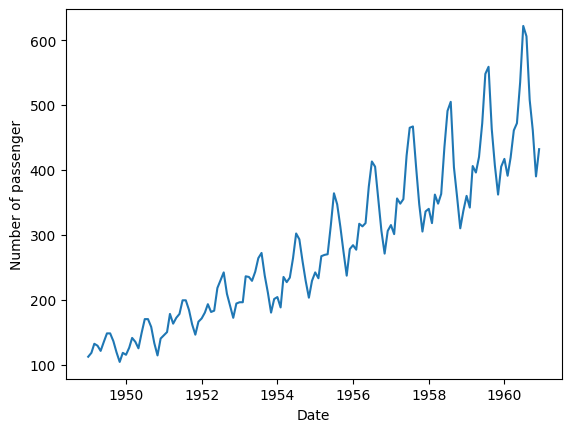

In [ ]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(IndexData)

In [ ]:
rolmean=IndexData.rolling(window=12).mean()
rolstd=IndexData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


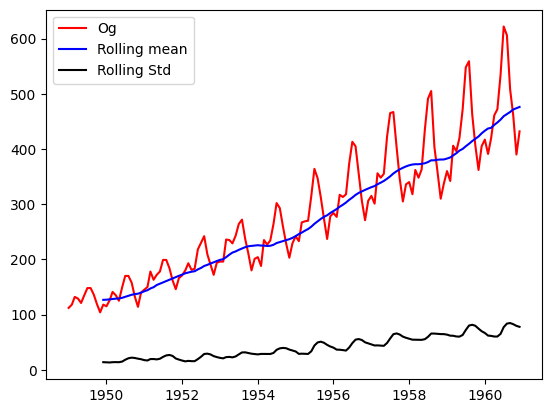

In [ ]:
#rolling stat
orginal=plt.plot(IndexData, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()


# we use # conclude the data is not stationary

In [ ]:
def plot_graph(timeseries):
  rolmean=timeseries.rolling(window=12).mean()
  rolstd=timeseries.rolling(window=12).std()
  print(rolmean, rolstd)

  orginal=plt.plot(timeseries, color='red', label ='Og')
  mean=plt.plot(rolmean, color='blue', label="Rolling mean")
  std=plt.plot(rolstd, color='black', label="Rolling Std")
  plt.legend(loc='best')
  plt.title('Time Series with rolling mean and std. dev.')
  plt.show()



            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


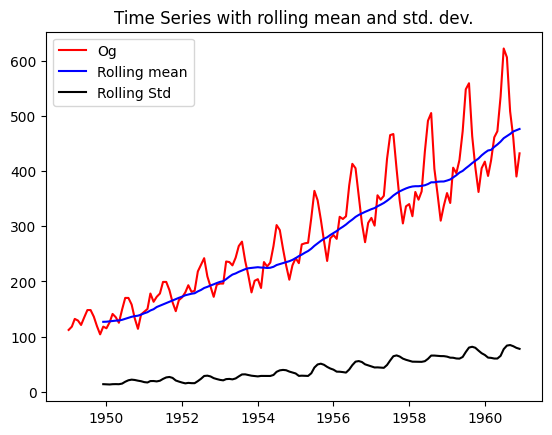

In [ ]:
plot_graph(IndexData)

In [ ]:
def adcf_test(timeseries):
  from statsmodels.tsa.stattools import adfuller
  dftest = adfuller(timeseries)
  print(dftest)

In [ ]:
adcf_test(IndexData)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [ ]:
def test_stationarity(timeseries):
  rolmean=timeseries.rolling(window=12).mean()
  rolstd=timeseries.rolling(window=12).std()
  print(rolmean, rolstd)

  orginal=plt.plot(timeseries, color='red', label ='Og')
  mean=plt.plot(rolmean, color='blue', label="Rolling mean")
  std=plt.plot(rolstd, color='black', label="Rolling Std")
  plt.legend(loc='best')
  plt.title('Time Series with rolling mean and std. dev.')
  plt.show()

  from statsmodels.tsa.stattools import adfuller
  dftest = adfuller(timeseries)

  print(dftest)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


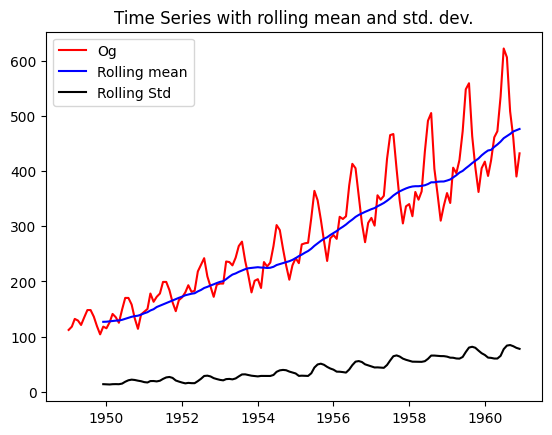

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [ ]:
test_stationarity(IndexData)

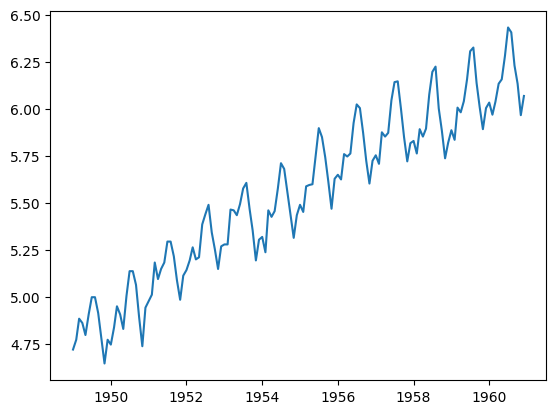

In [ ]:
IndexData_logScale=np.log(IndexData)
plt.plot(IndexData_logScale)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     6.124517
1960-09-01     6.132246
1960-10-01     6.142628
1960-11-01     6.148837
1960-12-01     6.154215

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     0.171453
1960-09-01     0.174172
1960-10-01     0.169804
1960-11-01     0.160923
1960-12-01     0.156660

[144 rows x 1 columns]


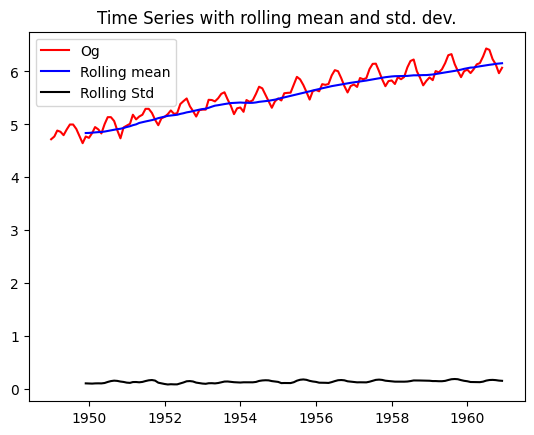

(-1.7170170891069683, 0.4223667747703874, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


In [ ]:
IndexData_logScale=np.log(IndexData)
test_stationarity(IndexData_logScale)

In [ ]:
Movingavg= IndexData_logScale.rolling(window=12).mean()
movingstd= IndexData_logScale.rolling(window=12).mean()

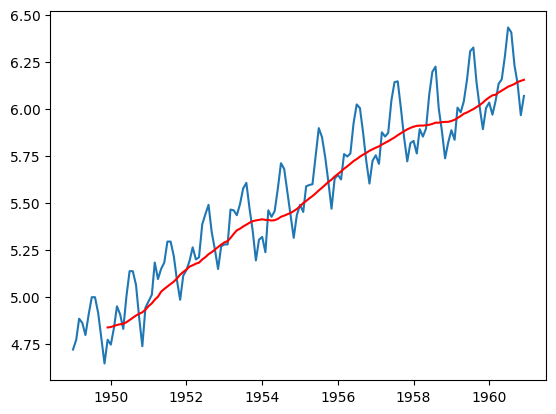

In [ ]:
plt.plot(IndexData_logScale)
plt.plot(Movingavg, color='red')

# mean is not stationary as it moves with time

In [ ]:
# for getting time series as stationary
dataset_Log_minus_moving_avg= IndexData_logScale-Movingavg
dataset_Log_minus_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
# rempove nan
dataset_Log_minus_moving_avg.dropna(inplace=True)
dataset_Log_minus_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


            #Passengers
Month                  
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
...                 ...
1960-08-01     0.053566
1960-09-01     0.051081
1960-10-01     0.051255
1960-11-01     0.047814
1960-12-01     0.044372

[133 rows x 1 columns]             #Passengers
Month                  
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
...                 ...
1960-08-01     0.145302
1960-09-01     0.144162
1960-10-01     0.144082
1960-11-01     0.149491
1960-12-01     0.152260

[133 rows x 1 columns]


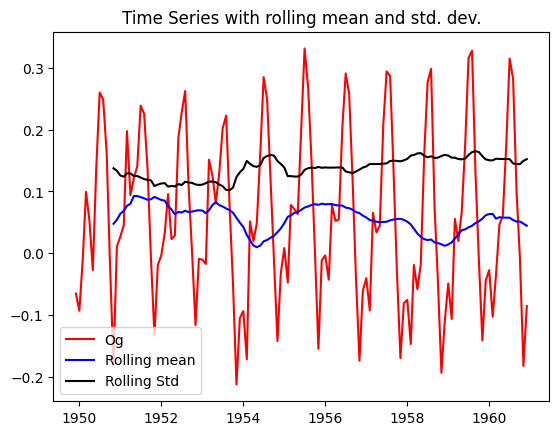

(-3.1629079913008833, 0.022234630001242206, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


In [ ]:
Movingavg= IndexData_logScale.rolling(window=12).mean()
dataset_Log_minus_moving_avg= IndexData_logScale-Movingavg
dataset_Log_minus_moving_avg.dropna(inplace=True)
test_stationarity(dataset_Log_minus_moving_avg)

            #Passengers
Month                  
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
...                 ...
1960-08-01     0.006728
1960-09-01     0.007730
1960-10-01     0.010382
1960-11-01     0.006209
1960-12-01     0.005378

[143 rows x 1 columns]             #Passengers
Month                  
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
...                 ...
1960-08-01     0.111374
1960-09-01     0.109497
1960-10-01     0.106223
1960-11-01     0.112489
1960-12-01     0.111669

[143 rows x 1 columns]


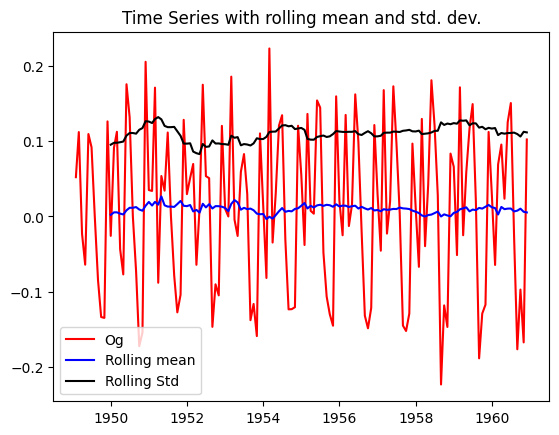

(-2.717130598388114, 0.07112054815086184, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)


In [ ]:
IndexData_logScale_ps = IndexData_logScale.diff(periods=1)
IndexData_logScale_ps.dropna(inplace=True)
test_stationarity(IndexData_logScale_ps)

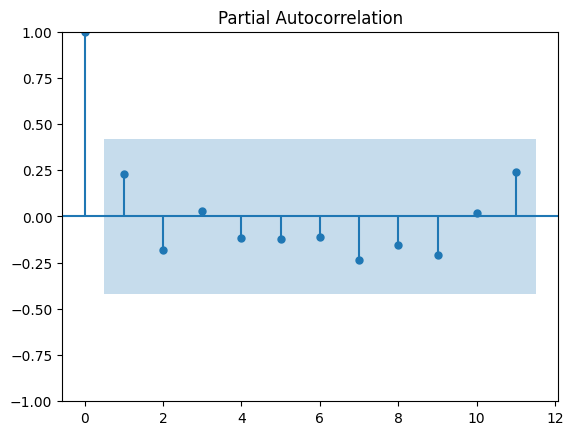

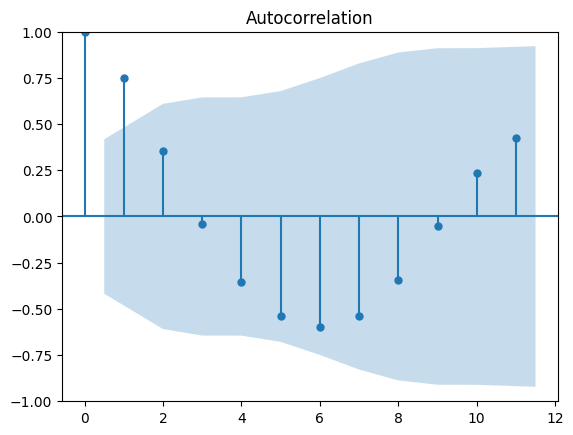

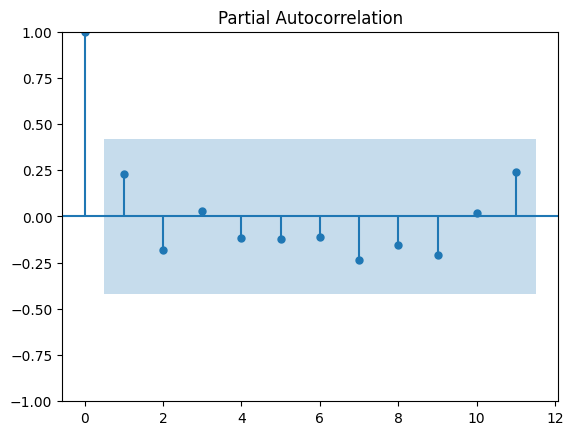

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

lag_acf = acf(dataset_Log_minus_moving_avg)
lag_pacf = pacf(dataset_Log_minus_moving_avg)

plot_acf(lag_acf)
plot_pacf(lag_pacf)


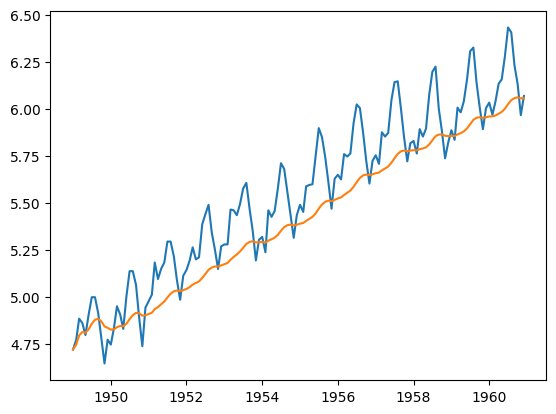

In [ ]:
 exponential_decay_weighted_avg=IndexData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
 plt.plot(IndexData_logScale)
 dataset_Log_minus_moving_avg.dropna(inplace=True)
 plt.plot(exponential_decay_weighted_avg)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexData_logScale)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

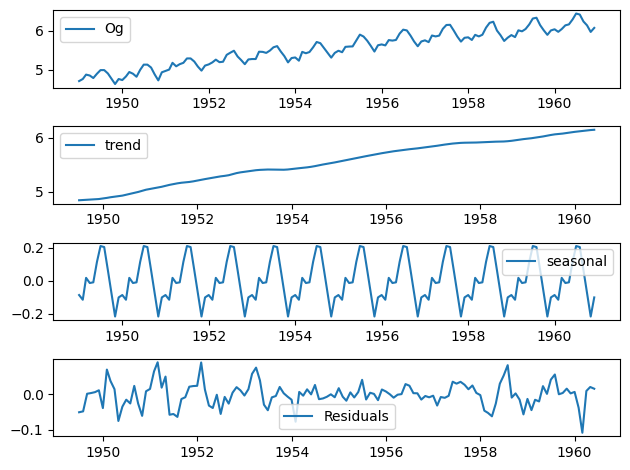

In [ ]:
plt.subplot(411)
plt.plot(IndexData_logScale, label='Og')
plt.legend(loc='best')
plt.subplot(412)

plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

dataset_Log_minus_moving_avg.dropna(inplace=True)
train, test = train_test_split(dataset_Log_minus_moving_avg, test_size=0.10, shuffle=False)

# ARIMA model
model_arima = ARIMA(train, order=(15, 2, 1))
model_arima_fit = model_arima.fit()

predictions = model_arima_fit.predict(start='1959-11-01', end='1960-08-01')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [ ]:
test.head()

,#Passengers
Month,
1959-11-01,-0.141406
1959-12-01,-0.044481
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530


In [ ]:
test.tail()

,#Passengers
Month,
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690
1960-12-01,-0.085789


In [ ]:
# Test and prediction data have different number of arrays and mean_squared_error can only work with variables with same number of arrays.
min_length = min(len(test), len(predictions))

test = test[:min_length]
predictions = predictions[:min_length]

error = mean_squared_error(test, predictions)

# Print the result
print('Test MSE %.3f' % error)

Test MSE 0.003


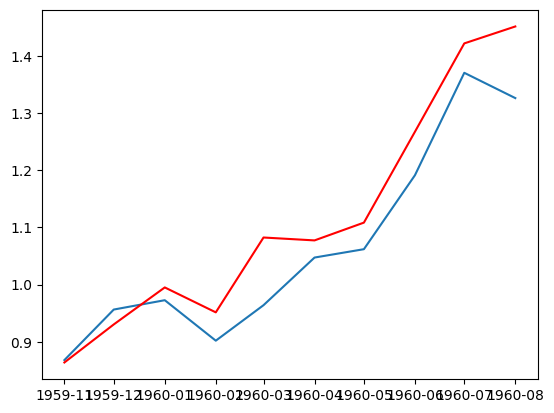

In [ ]:
predict = np.exp(predictions)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color='red')
plt.show()

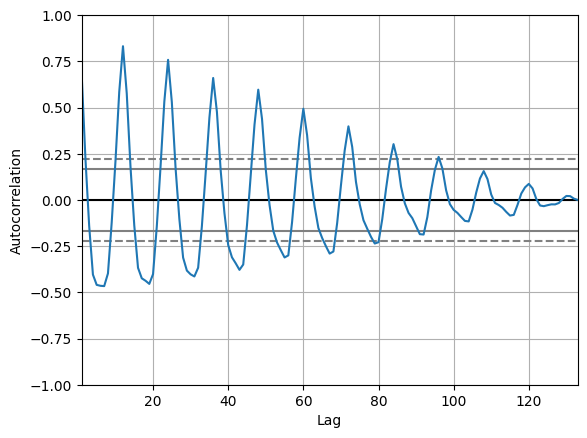

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset_Log_minus_moving_avg)
plt.show()

<Axes: ylabel='Density'>

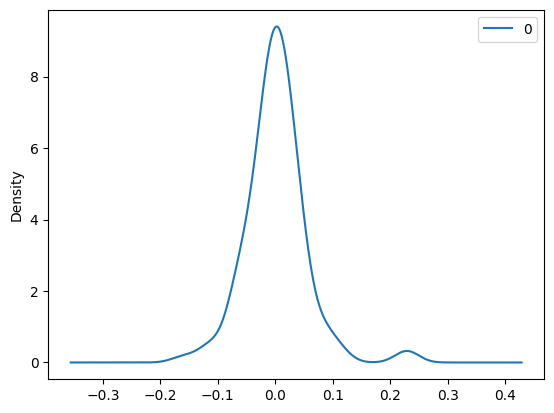

In [ ]:
from pandas import DataFrame
residual = DataFrame(model_arima_fit.resid)
residual.plot(kind='kde')
